# CSPY analyzer for RS

In [1]:
#---------- for python2
from __future__ import print_function

In [2]:
#---------- import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
#---------- setting for plot
plt.rcParams['pdf.fonttype'] = 42 # Type42はpdfにフォント埋め込み可能

In [4]:
#---------- If you don't use seaborn, comment out this cell
import seaborn as sns
sns.set_style('darkgrid', {'axes.edgecolor': 'black', 'axes.linewidth': 1.0})
sns.set_context('talk', font_scale=1.5)
#sns.set_palette('deep')
sns.set_palette("dark")

## Data

In [5]:
def load_rslt():
    with open('./pkl_data/rslt_data.pkl', 'rb') as rdata:
        rslt_data = pickle.load(rdata)
    return rslt_data

In [6]:
rslt_data = load_rslt()

#---------- sort by ID
#rslt_data.head(10)

#---------- sort by Energy
rslt_data.sort_values(by=['Energy']).head(10)

,Struc_ID,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,Energy,Magmom,Opt
3,4,213,P4_132,227,Fd-3m,-5085.976014,NaN,done
12,12,7,Pc,14,P2_1/c,-5084.846418,NaN,done
8,10,110,I4_1cd,88,I4_1/a,-5084.686394,NaN,done
0,0,199,I2_13,220,I-43d,-5083.711738,NaN,done
9,3,69,Fmmm,191,P6/mmm,-5083.621861,NaN,done
11,11,217,I-43m,229,Im-3m,-5083.420211,NaN,done
13,14,69,Fmmm,221,Pm-3m,-5083.206139,NaN,done
4,5,19,P2_12_12_1,19,P2_12_12_1,-5082.424876,NaN,not_yet
1,1,83,P4/m,123,P4/mmm,-5082.178688,NaN,done
19,17,127,P4/mbm,139,I4/mmm,-5081.981866,NaN,done


In [7]:
#---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

#---------- check success and error
nsuccess = rslt_data['Energy'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

#---------- minimum
Emin = rslt_data['Energy'].min()
print('Emin: {} eV'.format(Emin))

#---------- magmom (absolute value)
magmom = np.abs(rslt_data['Magmom'])
magmax = magmom.max()

Number of data: 20
Success: 20
Error: 0
Emin: -5085.9760143 eV


## Energy

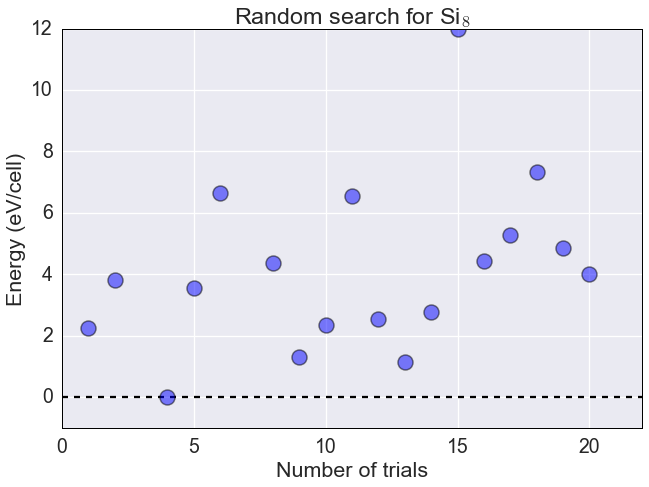

In [9]:
#---------- axis
plt.xlim([0, ndata+2])
plt.ylim([-1, 12])

#---------- hline at zero
plt.hlines(0.0, 0, 5000, 'k', '--')

#---------- plot
x = np.arange(1, ndata+1)
plt.plot(x,  rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1.5, alpha=0.5)

#---------- title and label
plt.title('Random search for Si$_{8}$')
plt.xlabel('Number of trials')
plt.ylabel('Energy (eV/cell)')

#---------- save figure
#plt.savefig('Si8_RS.png', bbox_inches='tight')
#plt.savefig('Si8_RS.png', bbox_inches='tight', dpi=300)    # high dpi
#plt.savefig('Si8_RS.pdf', bbox_inches='tight', dpi=300)    # high dpi

## Energy vs Magmom

In [ ]:
#---------- plot
plt.xlim([0, magmax+2])
plt.ylim([-5, 30])

plt.plot(magmom, rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1.5, alpha=0.5)

#---------- title and label
plt.title('Random search for Y$_2$Co$_{17}$')
plt.xlabel('Magnetic moment ($\mu_\mathrm{B}$/cell)')
plt.ylabel('Energy (eV/cell)')

#---------- save figure
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight')
#plt.savefig('Y2Co17_E_mag.pdf', bbox_inches='tight', dpi=300)    # high dpi
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight', dpi=300)    # high dpi